In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

# Data Preparation

## John Hopkins GITHUB csv data

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,981
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815


In [3]:
time_idx=pd_raw.columns[4:]
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [4]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [5]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [6]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

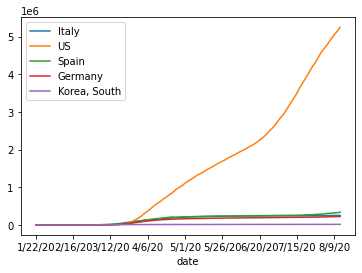

In [7]:
df_plot.set_index('date').plot()

## Date Type Data

In [8]:
df_plot.tail()

,date,Italy,US,Spain,Germany,"Korea, South"
200,8/9/20,250566,5044864,314362,217288,14626
201,8/10/20,250825,5094400,322980,218508,14660
202,8/11/20,251237,5141208,326612,219540,14714
203,8/12/20,251713,5197411,329784,220859,14770
204,8/13/20,252235,5248854,337334,222281,14873


In [9]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [10]:
df_plot['date']=time_idx
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [11]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relational data model - defining a primary key

A primary key’s main features are:

   * It must contain a unique value for each row of data.
   * It cannot contain null values.


In [12]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,981
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815


In [13]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [14]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424
1,no,Albania,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971
2,no,Algeria,0,0,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187
3,no,Andorra,0,0,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,981
4,no,Angola,0,0,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815


In [15]:
pd_relational_model = (pd_data_base.set_index(['state', 'country'])
                       .T
                       .stack(level = [0,1])
                       .reset_index()
                       .rename(columns={'level_0':'date',
                                                   0:'confirmed'})
                      )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [16]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [17]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [18]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [19]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
53452 2020-08-09    no      US    5044864
53718 2020-08-10    no      US    5094400
53984 2020-08-11    no      US    5141208
54250 2020-08-12    no      US    5197411
54516 2020-08-13    no      US    5248854


In [20]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1030,1030,1050,1065,1086,1169,1174,1162,1188,1196
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3263,3322,3380,3443,3502,3544,3651,3670,3710,3744
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,563,564,565,569,573,575,576,579,581,586
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,381,384,413,416,426,438,442,444,453,457
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,741,745,759,774,788,800,812,816,825,835


In [21]:
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [22]:
pd_relational_model_US = (pd_data_base_US.set_index(['state']) 
                                .T                              
                                .stack()             
                                .reset_index()                  
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'})
                            )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [23]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [24]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [25]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [26]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [27]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5
